In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

aq_df = pd.read_csv(
    "/data/FannieMae/2010Q1/Acquisition_2010Q1.txt"
)

In [3]:
len(aq_df.columns[0])
print(aq_df.columns)

Index(['100010079393|C|WELLS FARGO BANK', ' N.A.|4.875|284000|360|01/2010|03/2010|80|80|1|32|773|Y|P|PU|1|P|TX|787||FRM|||N'], dtype='object')


In [65]:
NAMES = {
    0: "loan_id",
    3: "original_interest_rate",
    8: "original_loan_to_value",
    11: "debt_to_income"
}
col_names = [
    NAMES.get(idx, f"{idx}") for idx, _ in enumerate(range(25))
]
aq_df = pd.read_csv(
    "/data/FannieMae/2010Q1/Acquisition_2010Q1.txt",
    header=None,
    names=col_names,
    sep="|"
)

In [7]:
print(aq_df.columns)

Index(['loan_id', '1', '2', 'original_interest_rate', '4', '5', '6', '7',
       'original_loan_to_value', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')


In [8]:
IDS = aq_df["loan_id"]
idx = IDS[1]
print(f"Using ID: {idx}")

Using ID: 100013622306


In [9]:
NAMES = {
    0: "loan_id",
    15: "forclosure_date"
}
col_names = [
    NAMES.get(idx, f"{idx}") for idx, _ in enumerate(range(31))
]


In [10]:
per_df = pd.read_csv(
    "/data/FannieMae/2010Q1/Performance_2010Q1.txt",
    header=None,
    names=col_names,
    sep="|"
)

/home/capcolabs/Environments/FannieData/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
per_df.rename(index=NAMES)

,loan_id,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
loan_id,100010079393,02/01/2010,"WELLS FARGO BANK, N.A.",4.875,NaN,0,360,360.0,02/2040,12420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,100010079393,03/01/2010,NaN,4.875,NaN,1,359,358.0,02/2040,12420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,100010079393,04/01/2010,NaN,4.875,NaN,2,358,358.0,02/2040,12420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,100010079393,05/01/2010,NaN,4.875,NaN,3,357,357.0,02/2040,12420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,100010079393,06/01/2010,NaN,4.875,NaN,4,356,355.0,02/2040,12420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18080687,999999167522,10/01/2011,NaN,5.250,405309.95,20,340,337.0,02/2040,36140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
18080688,999999167522,11/01/2011,NaN,5.250,404780.49,21,339,336.0,02/2040,36140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
18080689,999999167522,12/01/2011,NaN,5.250,404248.71,22,338,335.0,02/2040,36140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
18080690,999999167522,01/01/2012,NaN,5.250,403714.61,23,337,334.0,02/2040,36140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [12]:
def show_id(idx, df):
    holder = df['loan_id'] == idx
    return df[holder]

print(show_id(idx, per_df))

          loan_id           1                         2     3         4    5  \
12   100013622306  01/01/2010  JP MORGAN CHASE BANK, NA  4.75       NaN    0   
13   100013622306  02/01/2010                       NaN  4.75       NaN    1   
14   100013622306  03/01/2010                       NaN  4.75       NaN    2   
15   100013622306  04/01/2010                       NaN  4.75       NaN    3   
16   100013622306  05/01/2010                       NaN  4.75       NaN    4   
..            ...         ...                       ...   ...       ...  ...   
118  100013622306  11/01/2018                       NaN  4.75  42829.43  106   
119  100013622306  12/01/2018                       NaN  4.75  42322.24  107   
120  100013622306  01/01/2019                       NaN  4.75  41813.05  108   
121  100013622306  02/01/2019                       NaN  4.75  41813.05  109   
122  100013622306  03/01/2019                       NaN  4.75  40788.61  110   

       6      7        8      9  ...  2

In [13]:
per_df.columns

Index(['loan_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', 'forclosure_date', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30'],
      dtype='object')

In [14]:
per_df['forclosure_date']

holder = per_df['forclosure_date'].notna()

forclosed = per_df[holder]

In [15]:
forclosed['forclosure_date']

8569        11/01/2012
13104       11/01/2016
19511       03/01/2015
24022       05/01/2016
29452       12/01/2013
               ...    
18017360    10/01/2017
18041186    06/01/2015
18053790    04/01/2015
18066632    11/01/2017
18077778    01/01/2017
Name: forclosure_date, Length: 1613, dtype: object

In [17]:
FORCLOSED = set(forclosed['loan_id'])

In [66]:
# https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
# https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns

def mapper(row):
    return row['loan_id'] in FORCLOSED

aq_df['forclosed'] = aq_df.apply(mapper, axis=1)

# Now With Some Algorithms

## Linear Regresssion

In [24]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

from sklearn.linear_model import LinearRegression

In [70]:
X = aq_df['original_loan_to_value']
X = np.array(X)
X = X.reshape(-1, 1)
y = aq_df['forclosed']
y = np.array(y).astype(np.int)

In [71]:
reg = LinearRegression().fit(X, y)

In [72]:
reg.score(X, y)

0.0017145677401712023

## Logistic Regression

In [73]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

In [74]:
clf = LogisticRegression(
    random_state=0, solver='lbfgs',
    multi_class='multinomial').fit(X, y)

In [75]:
clf.score(X, y)

0.995008880664905

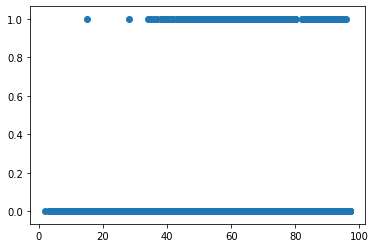

In [53]:
plt.scatter(X, y)
plt.show()

In [60]:
X = aq_df['original_loan_to_value']
X = np.array(X)
Z = zip(X,y)

In [61]:
F, N = [], []
for z in Z:
    if z[1] == 1:
        F.append(z[0])
    else:
        N.append(z[0])

(array([  1.,   1.,   8.,  25.,  49., 124., 202., 485., 545., 173.]),
 array([15. , 23.1, 31.2, 39.3, 47.4, 55.5, 63.6, 71.7, 79.8, 87.9, 96. ]),
 <a list of 10 Patch objects>)

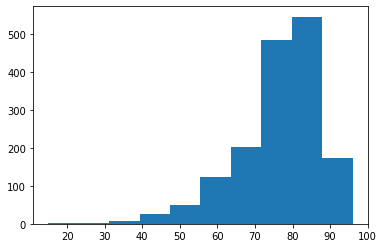

In [62]:
plt.hist(F)

(array([  423.,  3538., 11359., 17798., 29540., 36569., 48878., 69514.,
        88906., 15036.]),
 array([ 2. , 11.5, 21. , 30.5, 40. , 49.5, 59. , 68.5, 78. , 87.5, 97. ]),
 <a list of 10 Patch objects>)

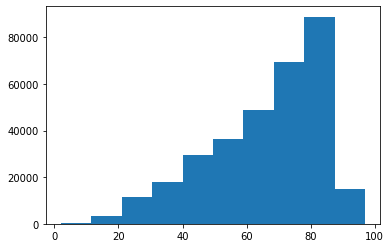

In [63]:
plt.hist(N)

## Bringing In More Features

In [101]:
X0 = aq_df['original_loan_to_value']
X1 = aq_df['debt_to_income']

F = aq_df['forclosed']

# https://stackoverflow.com/questions/21231834/creating-a-pandas-dataframe-from-columns-of-other-dataframes-with-similar-indexe
XH = pd.concat(
    [aq_df['original_loan_to_value'], aq_df['debt_to_income'], aq_df['forclosed']], 
     keys=['original_loan_to_value', 'debt_to_income', 'forclosed']
)

HOLD = XH['debt_to_income'].notnull()

XZ = zip(X0, X1, HOLD, F)

X = []
y = []

for x0, x1, valid, f in XZ:
    if valid:
        X.append([x0, x1])
        y.append(f)

y = np.array(y).astype(np.int)

In [108]:
lgr = LogisticRegression(
    random_state=0, solver='lbfgs',
    multi_class='multinomial').fit(X, y)

In [109]:
lgr.score(X, y)

0.9950163521070501

/home/capcolabs/Environments/FannieData/venv/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/capcolabs/Environments/FannieData/venv/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 1423.,  9397., 28202., 56592., 56993., 57993., 62074., 28283.,
        13438.,  6053.]),
 array([ 1. ,  7.3, 13.6, 19.9, 26.2, 32.5, 38.8, 45.1, 51.4, 57.7, 64. ]),
 <a list of 10 Patch objects>)

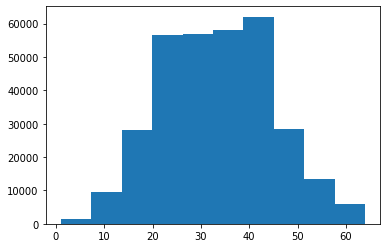

In [79]:
plt.hist(X1)

## Decision Tree

In [104]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier

In [110]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [111]:
dtc.score(X,y)

0.995022593369283